# Module 4 : Performance measurements of SMLT - Tremor

In [76]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:

datat = p.read_csv("data.csv")

In [79]:
dft=datat.dropna()


In [80]:
dft.columns

Index(['Unnamed: 0', 'no_strokes_st', 'no_strokes_dy', 'speed_st', 'speed_dy',
       'magnitude_vel_st', 'magnitude_horz_vel_st', 'magnitude_vert_vel_st',
       'magnitude_vel_dy', 'magnitude_horz_vel_dy', 'magnitude_vert_vel_dy',
       'magnitude_acc_st', 'magnitude_horz_acc_st', 'magnitude_vert_acc_st',
       'magnitude_acc_dy', 'magnitude_horz_acc_dy', 'magnitude_vert_acc_dy',
       'magnitude_jerk_st', 'magnitude_horz_jerk_st', 'magnitude_vert_jerk_st',
       'magnitude_jerk_dy', 'magnitude_horz_jerk_dy', 'magnitude_vert_jerk_dy',
       'ncv_st', 'ncv_dy', 'nca_st', 'nca_dy', 'in_air_stcp', 'on_surface_st',
       'on_surface_dy', 'target'],
      dtype='object')

In [81]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Unnamed: 0', 'no_strokes_st', 'no_strokes_dy', 'speed_st', 'speed_dy',
       'magnitude_vel_st', 'magnitude_horz_vel_st', 'magnitude_vert_vel_st',
       'magnitude_vel_dy', 'magnitude_horz_vel_dy', 'magnitude_vert_vel_dy',
       'magnitude_acc_st', 'magnitude_horz_acc_st', 'magnitude_vert_acc_st',
       'magnitude_acc_dy', 'magnitude_horz_acc_dy', 'magnitude_vert_acc_dy',
       'magnitude_jerk_st', 'magnitude_horz_jerk_st', 'magnitude_vert_jerk_st',
       'magnitude_jerk_dy', 'magnitude_horz_jerk_dy', 'magnitude_vert_jerk_dy',
       'ncv_st', 'ncv_dy', 'nca_st', 'nca_dy', 'in_air_stcp', 'on_surface_st',
       'on_surface_dy']
le = LabelEncoder()
for i in var_mod:
    dft[i] = le.fit_transform(dft[i]).astype(str)

In [82]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [83]:
X = dft.drop(labels='target', axis=1)
#Response variable
y = dft.loc[:,'target']    

In [84]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [85]:
# Prevent view warnings
X_train.is_copy = False
X_test.is_copy = False

Logistic Regression :

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logR= LogisticRegression(random_state=1)

logR.fit(X_train,y_train)

predictR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(logR, X, y, scoring='accuracy')
lr=accuracy.mean() * 100

print('Accuracy result of Logistic Regression is:', lr)
print("")
cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Logistic Regression is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")



Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.95      1.00      0.97        19

    accuracy                           0.96        24
   macro avg       0.97      0.90      0.93        24
weighted avg       0.96      0.96      0.96        24

Accuracy result of Logistic Regression is: 91.08333333333334

Confusion Matrix result of Logistic Regression is:
 [[ 4  1]
 [ 0 19]]

Sensitivity :  0.8

Specificity :  1.0



In [87]:
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 19
True Negative : 4
False Positive : 1
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.8
False Positive Rate : 0.2
False Negative Rate : 0.0

Positive Predictive Value : 0.95
Negative predictive value : 1.0


Decision Tree Classifier :

In [88]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)

dtree.fit(X_train, y_train)

predictDT = dtree.predict(X_test)

print("")
print('Classification report of Decision Tree Classifier Results:')
print("")

print(classification_report(y_test,predictDT))
accuracy = cross_val_score(dtree, X, y, scoring='accuracy')
dt=accuracy.mean() * 100
print('Accuracy result of Decision Tree Classifier is', dt)
print("")
cm2=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of Decision Tree Classifier is:\n', confusion_matrix(y_test,predictDT))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)



Classification report of Decision Tree Classifier Results:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Accuracy result of Decision Tree Classifier is 89.49999999999999

Confusion Matrix result of Decision Tree Classifier is:
 [[ 5  0]
 [ 0 19]]

Sensitivity :  1.0

Specificity :  1.0


In [89]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 19
True Negative : 5
False Positive : 0
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 1.0
False Positive Rate : 0.0
False Negative Rate : 0.0

Positive Predictive Value : 1.0
Negative predictive value : 1.0


Random Forest:

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1, n_estimators = 100)
rfc.fit(X_train,y_train)
predictR = rfc.predict(X_test)

print("")
print('Classification report of Random Forest Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(rfc, X, y, scoring='accuracy')
rf=accuracy.mean() * 100

print('Accuracy result of Random Forest is', rf)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)





Classification report of Random Forest Results:

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.95      1.00      0.97        19

    accuracy                           0.96        24
   macro avg       0.97      0.90      0.93        24
weighted avg       0.96      0.96      0.96        24

Accuracy result of Random Forest is 94.75

Confusion Matrix result of Random Forest is:
 [[ 4  1]
 [ 0 19]]

Sensitivity :  0.8

Specificity :  1.0


In [91]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 19
True Negative : 4
False Positive : 1
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.8
False Positive Rate : 0.2
False Negative Rate : 0.0

Positive Predictive Value : 0.95
Negative predictive value : 1.0


Support Vector Classifier:

In [92]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)
predictR = sv.predict(X_test)

print("")
print('Classification report of Support Vector Classifier Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(sv, X, y, scoring='accuracy')
sv=accuracy.mean() * 100

print('Accuracy result of Support Vector Classifier is', sv)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Support Vector Classifier is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)





Classification report of Support Vector Classifier Results:

              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75         5
         1.0       0.90      1.00      0.95        19

    accuracy                           0.92        24
   macro avg       0.95      0.80      0.85        24
weighted avg       0.92      0.92      0.91        24

Accuracy result of Support Vector Classifier is 90.83333333333334

Confusion Matrix result of Support Vector Classifier is:
 [[ 3  2]
 [ 0 19]]

Sensitivity :  0.6

Specificity :  1.0


In [93]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 19
True Negative : 3
False Positive : 2
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.6
False Positive Rate : 0.4
False Negative Rate : 0.0

Positive Predictive Value : 0.9047619047619048
Negative predictive value : 1.0


Naive Bayes:

In [94]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictR = gnb.predict(X_test)

print("")
print('Classification report of Naive Bayes Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(gnb, X, y, scoring='accuracy')
nb=accuracy.mean() * 100

print('Accuracy result of Naive Bayes is', nb)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Naive Bayes is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)





Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

         0.0       0.57      0.80      0.67         5
         1.0       0.94      0.84      0.89        19

    accuracy                           0.83        24
   macro avg       0.76      0.82      0.78        24
weighted avg       0.86      0.83      0.84        24

Accuracy result of Naive Bayes is 88.08333333333334

Confusion Matrix result of Naive Bayes is:
 [[ 4  1]
 [ 3 16]]

Sensitivity :  0.8

Specificity :  0.8421052631578947


In [95]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 16
True Negative : 4
False Positive : 1
False Negative : 3

True Positive Rate : 0.8421052631578947
True Negative Rate : 0.8
False Positive Rate : 0.2
False Negative Rate : 0.15789473684210525

Positive Predictive Value : 0.9411764705882353
Negative predictive value : 0.5714285714285714


K-Nearest Neighbor:

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=5)
knnc.fit(X_train,y_train)
predictR = knnc.predict(X_test)

print("")
print('Classification report of K-Nearest Neighbor Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(knnc, X, y, scoring='accuracy')
kn=accuracy.mean() * 100

print('Accuracy result of K-Nearest Neighbor is', kn)
print("")
cm2=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of K-Nearest Neighbor is:\n', confusion_matrix(y_test,predictR))
print("")

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)





Classification report of K-Nearest Neighbor Results:

              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75         5
         1.0       0.90      1.00      0.95        19

    accuracy                           0.92        24
   macro avg       0.95      0.80      0.85        24
weighted avg       0.92      0.92      0.91        24

Accuracy result of K-Nearest Neighbor is 83.16666666666667

Confusion Matrix result of K-Nearest Neighbor is:
 [[ 3  2]
 [ 0 19]]

Sensitivity :  0.6

Specificity :  1.0


In [97]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 19
True Negative : 3
False Positive : 2
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.6
False Positive Rate : 0.4
False Negative Rate : 0.0

Positive Predictive Value : 0.9047619047619048
Negative predictive value : 1.0


In [98]:
def graph():
    import matplotlib.pyplot as plt
    data1=[lr,dt,rf,sv,nb,kn]
    alg="LR","DT","RF","SVM","NB","KNN"
    plt.figure(figsize=(10,5))
    b=plt.bar(alg,data1,color=("r","g","b","y","m","black"))
    plt.title("Accuracy comparison of Parkinson by Tremor",fontsize=15)
    plt.legend(b,data1,fontsize=9)
    plt.savefig('tremor.png')

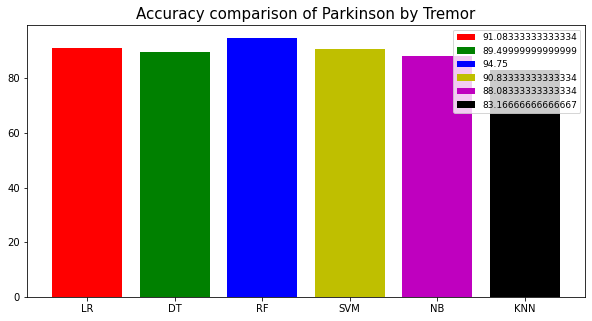

In [99]:
graph()

In [100]:

import tkinter
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import numpy as np
root = tkinter.Tk()
root.wm_title("Accuracy plot for Parkinson disease by tremor")
fig = Figure(figsize=(10,10),dpi=1)
canvas = FigureCanvasTkAgg(fig, master=root)  
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
icon=tkinter.PhotoImage(file='tremor.png')   
label=tkinter.Label(root,image=icon)
label.pack()
root.mainloop()